# LearnX Sales Forecasting

LearnX is an online learning platform aimed at professionals and students. LearnX serves as a market place that allows instructors to build online courses on topics of their expertise which is later published after due diligence by the LearnX team. The platform covers a wide variety of topics including Development, Business, Finance & Accounting & Software Marketing and so on


Effective forecasting for course sales gives essential insight into upcoming cash flow meaning business can more accurately plan the budget to pay instructors and other operational costs and invest in the expansion of the business.


Sales data for more than 2 years from 600 courses of LearnX's top domains is available along with information on


<li>Competition in the market for each course</li>
<li>Course Type (Course/Program/Degree)</li>
<li>Holiday Information for each day</li>
<li>User Traffic on Course Page for each day</li>

Your task is to predict the course sales for each course in the test set for the next 60 days

s

## Data Dictionary
<i>Train (Historical Sales Data)</i>

    Variable	            Definition
    ID	                    Unique Identifier for a row
    Day_No	                Day Number
    Course_ID	            Unique ID for a course
    Course_Domain	        Course Domain (Development, Finance etc.)
    Course_Type	            Course/Program/Degree
    Short_Promotion	        Whether Short Term Promotion is Live
    Public_Holiday	        Regional/Public Holiday
    Long_Promotion	        Whether Long Term Promotion is Live for the course
    User_Traffic	        Number of customers landing on the course page
    Competition_Metric	    A metric defining the strength of competition 
    Sales	                (Target) Total Course Sales


## Test (Next 60 Days)
<i>This file contains the store and day number for which the participant needs to submit predictions/forecasts</i>

    Variable	            Definition
    ID	                    Unique Identifier for a row
    Day_No	                Day Number
    Course_ID	            Unique ID for a course
    Course_Domain	        Course Domain (Development, Finance etc.)
    Course_Type	            Course/Program/Degree
    Short_Promotion	        Whether Short Term Promotion is Live
    Public_Holiday	        Regional/Public Holiday
    Long_Promotion	        Whether Long Term Promotion is Live for the course
    Competition_Metric	    A metric defining the strength of competition


## Evaluation
The evaluation metric for this competition is 1000*RMSLE where RMSLE is Root of Mean Squared Logarithmic Error across all entries in the test set.



## Code File: A single Jupyter Notebook should ideally have the following sections
- Exploratory Data Analysis (EDA)
- Data Preprocessing/Cleaning/Feature Selection
- Model Building & Cross Validation
- Creation of Submission File

## Approach PPT
- Insights from EDA and most important data visualizations
- Assumptions made if any
- Data Preprocessing & missing value imputation steps for each variable
- Final Model Description along with parameters
- Internal Cross Validation/Other Validation Scores

The participant must clear a stipulated threshold of 180 at the private leaderboard that means your score must be less than 180 in order to pass this assessment

<b>--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>
<br>

# <b>STEPS </b>

## Data Preperation and Cleaning

1. Load Data
2. Look at data and columns (columns, datatype, info)
3. Identify if any category columns which are currently set at numeric. Change their type to category.
4. Look closely at data and try to ask questions regarding it - Hypothesis. 
5. Fix any missing or incorrect values<br>
        - As only 0.003% of data has missing value, we can remove these rows. <br>
        - We will try to create 2 models, one with data deleted and one with competition_metric set as 0.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To plot QQ plot
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# EDA

In [4]:
train_data.shape, test_data.shape

((512087, 11), (36000, 9))

In [5]:
train_data.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [6]:
train_data.isnull().sum()

ID                       0
Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64

In [7]:
# Find percent of data missing
(train_data.isnull().sum() / len(train_data))*100

ID                    0.000000
Day_No                0.000000
Course_ID             0.000000
Course_Domain         0.000000
Course_Type           0.000000
Short_Promotion       0.000000
Public_Holiday        0.000000
Long_Promotion        0.000000
User_Traffic          0.000000
Competition_Metric    0.344473
Sales                 0.000000
dtype: float64

As only 0.34% of data is null in Competition_Metric, we should be able to drop the columns with null value

Notes: I tried dropping the data but it created issue with the testing data. As test data also has lots of missing Competition_Metric, we are assuming that there is no competition where Competition_Metric is null, thus filling in the value 0

In [4]:
train_data["Competition_Metric"].replace(to_replace =np.nan, value =0, inplace=True)
test_data["Competition_Metric"].replace(to_replace =np.nan, value =0, inplace=True)


In [7]:
#train_data.drop(train_data[train_data.Competition_Metric.isnull()].index, axis=0, inplace=True)

In [119]:
train_data.isnull().sum()

ID                    0
Day_No                0
Course_ID             0
Course_Domain         0
Course_Type           0
Short_Promotion       0
Public_Holiday        0
Long_Promotion        0
User_Traffic          0
Competition_Metric    0
Sales                 0
dtype: int64

In [120]:
test_data.isnull().sum()

ID                    0
Day_No                0
Course_ID             0
Course_Domain         0
Course_Type           0
Short_Promotion       0
Public_Holiday        0
Long_Promotion        0
Competition_Metric    0
dtype: int64

In [14]:
train_data.nunique()

ID                    512087
Day_No                   882
Course_ID                600
Course_Domain              4
Course_Type                3
Short_Promotion            2
Public_Holiday             2
Long_Promotion             2
User_Traffic            3475
Competition_Metric       196
Sales                    544
dtype: int64

In [15]:
train_data.dtypes

ID                      int64
Day_No                  int64
Course_ID               int64
Course_Domain          object
Course_Type            object
Short_Promotion         int64
Public_Holiday          int64
Long_Promotion          int64
User_Traffic            int64
Competition_Metric    float64
Sales                   int64
dtype: object

In [121]:
train_data.describe()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000
mean,274007.300650,434.917869,300.388344,0.380244,0.031639,0.488968,15375.101198,0.073092,120.826924
std,158228.834029,256.044161,173.365787,0.485447,0.175038,0.499879,7727.231205,0.100035,54.355258
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,136962.500000,214.000000,150.000000,0.000000,0.000000,0.000000,10584.000000,0.010000,84.000000
50%,273984.000000,427.000000,300.000000,0.000000,0.000000,0.000000,13776.000000,0.035000,111.000000
75%,411065.500000,658.000000,451.000000,1.000000,0.000000,1.000000,18123.000000,0.094000,146.000000
max,548027.000000,882.000000,600.000000,1.000000,1.000000,1.000000,100002.000000,0.768000,682.000000


In [5]:
# Category Columns

category_columns = ['Course_Domain', 'Course_Type', 'Short_Promotion', 'Public_Holiday', 'Long_Promotion']

for i in category_columns:
    train_data[i] = train_data[i].astype('category')

In [17]:
train_data.dtypes

ID                       int64
Day_No                   int64
Course_ID                int64
Course_Domain         category
Course_Type           category
Short_Promotion       category
Public_Holiday        category
Long_Promotion        category
User_Traffic             int64
Competition_Metric     float64
Sales                    int64
dtype: object

# New Features

Day Number is of no use directly here. We will try to convert Day to Date, Year, Month, Week

By looking at data, I assumed that Day 1 is 01/01/2016. Year 2016 because its a leap year. I got to know about leap yr via ‘Public Holiday’ on 366th Day.

In [6]:
# Function to convert Day_No to Year
def year_convert(df):
    Year_data = []
    for i in df.Day_No:
        if (i <= 366):
            Year_data.append("2016") 
        elif (i <= 731):
            Year_data.append("2017") 
        else:
            Year_data.append("2018")
    
    return Year_data


In [7]:
train_data["Year"] = year_convert(train_data)
test_data["Year"] = year_convert(test_data)

In [8]:
train_data.tail()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,Year
512082,548023,878,600,Software Marketing,Program,0,0,1,8904,0.07,114,2018
512083,548024,879,600,Software Marketing,Program,0,0,1,10542,0.07,145,2018
512084,548025,880,600,Software Marketing,Program,0,0,1,13671,0.07,167,2018
512085,548026,881,600,Software Marketing,Program,0,0,1,8904,0.07,107,2018
512086,548027,882,600,Software Marketing,Program,1,0,1,11445,0.07,152,2018


In [9]:
test_data.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Year
0,883,883,1,Development,Course,1,0,1,0.007,2018
1,884,884,1,Development,Course,1,0,1,0.007,2018
2,885,885,1,Development,Course,1,0,1,0.007,2018
3,886,886,1,Development,Course,1,0,1,0.007,2018
4,887,887,1,Development,Course,0,0,1,0.007,2018


In [10]:
# Function to convert Day_No to Day
def day_convert(df):
    day_data = []
    for i in df.Day_No:
        if (i <= 366):
            day_data.append(i) 
        elif (i <= 731):
            day_data.append(i - 366) 
        else:
            day_data.append(i - 731)
    return day_data

In [11]:
train_data["Day"] = day_convert(train_data)
test_data["Day"] = day_convert(test_data)

In [12]:
train_data.tail()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,Year,Day
512082,548023,878,600,Software Marketing,Program,0,0,1,8904,0.07,114,2018,147
512083,548024,879,600,Software Marketing,Program,0,0,1,10542,0.07,145,2018,148
512084,548025,880,600,Software Marketing,Program,0,0,1,13671,0.07,167,2018,149
512085,548026,881,600,Software Marketing,Program,0,0,1,8904,0.07,107,2018,150
512086,548027,882,600,Software Marketing,Program,1,0,1,11445,0.07,152,2018,151


In [13]:
test_data.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Year,Day
0,883,883,1,Development,Course,1,0,1,0.007,2018,152
1,884,884,1,Development,Course,1,0,1,0.007,2018,153
2,885,885,1,Development,Course,1,0,1,0.007,2018,154
3,886,886,1,Development,Course,1,0,1,0.007,2018,155
4,887,887,1,Development,Course,0,0,1,0.007,2018,156


In [14]:
from datetime import datetime

In [15]:
# Function to convert Day and Year to Date
def date_convert(df):
    date_data = []

    for i in df.index:
        date = datetime.strptime(str(df['Year'][i]) + "-" + str(df["Day"][i]), "%Y-%j").strftime("%m-%d-%Y")
        date_data.append(date)
    
    return date_data

In [16]:
train_data["Date"] = date_convert(train_data)
test_data["Date"] = date_convert(test_data)


In [17]:
# Function to find Month and WeekOfYear data
 
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df.Date.dt.month
    df['WeekofYear'] = df.Date.dt.isocalendar().week

In [18]:
split_date(train_data)
split_date(test_data)

In [19]:
train_data.tail()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,Year,Day,Date,Month,WeekofYear
512082,548023,878,600,Software Marketing,Program,0,0,1,8904,0.07,114,2018,147,2018-05-27,5,21
512083,548024,879,600,Software Marketing,Program,0,0,1,10542,0.07,145,2018,148,2018-05-28,5,22
512084,548025,880,600,Software Marketing,Program,0,0,1,13671,0.07,167,2018,149,2018-05-29,5,22
512085,548026,881,600,Software Marketing,Program,0,0,1,8904,0.07,107,2018,150,2018-05-30,5,22
512086,548027,882,600,Software Marketing,Program,1,0,1,11445,0.07,152,2018,151,2018-05-31,5,22


In [20]:
test_data.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Year,Day,Date,Month,WeekofYear
0,883,883,1,Development,Course,1,0,1,0.007,2018,152,2018-06-01,6,22
1,884,884,1,Development,Course,1,0,1,0.007,2018,153,2018-06-02,6,22
2,885,885,1,Development,Course,1,0,1,0.007,2018,154,2018-06-03,6,22
3,886,886,1,Development,Course,1,0,1,0.007,2018,155,2018-06-04,6,23
4,887,887,1,Development,Course,0,0,1,0.007,2018,156,2018-06-05,6,23


In [21]:
train_data['MonthYear'] = train_data['Month'].astype(str) + "-"+ train_data['Year'].astype(str)
test_data['MonthYear'] = test_data['Month'].astype(str) + "-"+ test_data['Year'].astype(str)

In [22]:
# Category Columns

category_columns = ['Course_Domain', 'Course_Type', 'Short_Promotion', 'Public_Holiday', 'Long_Promotion', 'Year', 'Month', 'MonthYear']

for i in category_columns:
    train_data[i] = train_data[i].astype('category')
    test_data[i] = test_data[i].astype('category')


In [23]:
continuous_columns = train_data.select_dtypes(["float64", "int64"])

In [24]:
len(continuous_columns.columns) + len(category_columns), len(train_data.columns)

(15, 17)

In [25]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

In [142]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

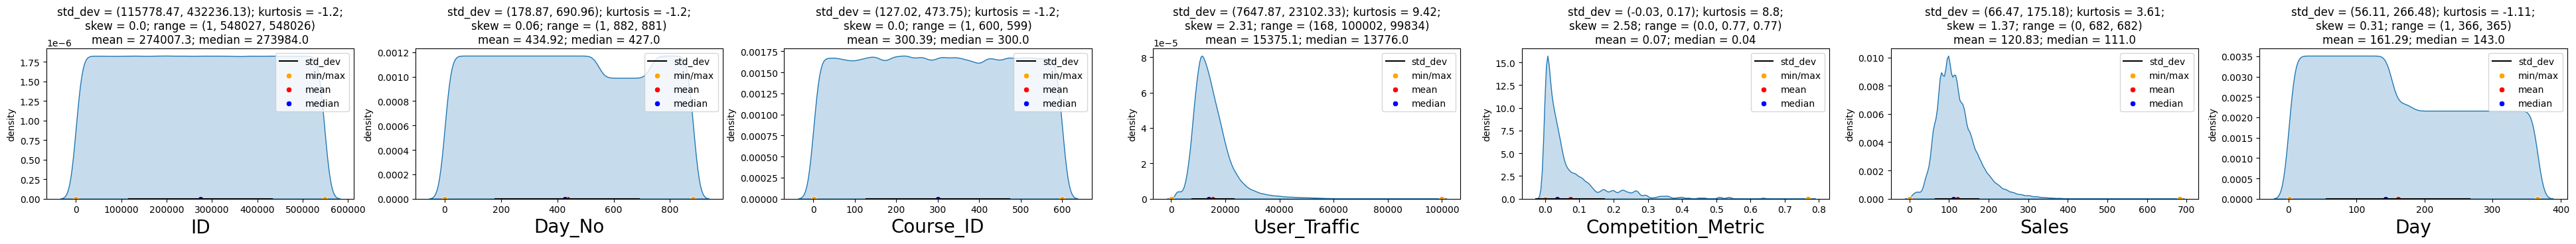

In [143]:
#UVA_numeric(train_data, ['User_Traffic', 'Competition_Metric', 'Sales', 'Day'])
UVA_numeric(train_data, continuous_columns.columns)

## <b>Conclusions</b>

-0.5 to 0.5 -> Symmetric </br>
Less than -0.5 -> Negatively Skewed </br>
More then 0.5 -> Positively Skewed </br></br>

Competition_Metric is Positively Skewed data. We need to normalize it\

- ID, Day_No and Day are pretty constant and not giving too much info. So can be eliminated during final modelling.
- Lets investigate "Competition_Metric" further

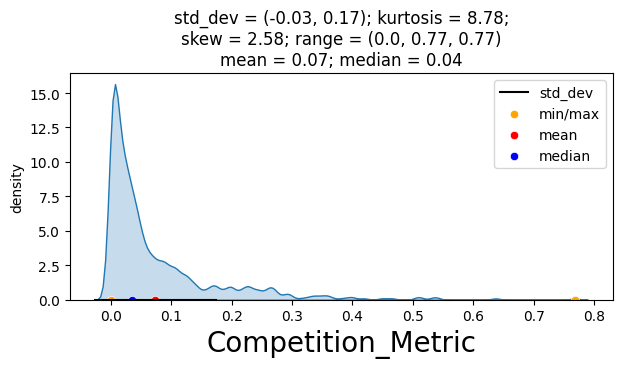

In [32]:
UVA_numeric(train_data, ["Competition_Metric"])

In [33]:
# standard deviation factor
factor = 3

# copying current_month
cm_data = train_data[continuous_columns.columns]

# filtering using standard deviation (not considering obseravtions > 3* standard deviation)
cm_data = cm_data[cm_data.Competition_Metric < factor*cm_data.Competition_Metric.std()]

# checking how many points removed
len(train_data), len(cm_data), len(train_data) - len(cm_data), (len(train_data) - len(cm_data))/len(train_data)

(512087, 491985, 20102, 0.0392550484585627)

We cannot drop the outliers, as it results in loss of 21 courses. So, we will normalize the outliers

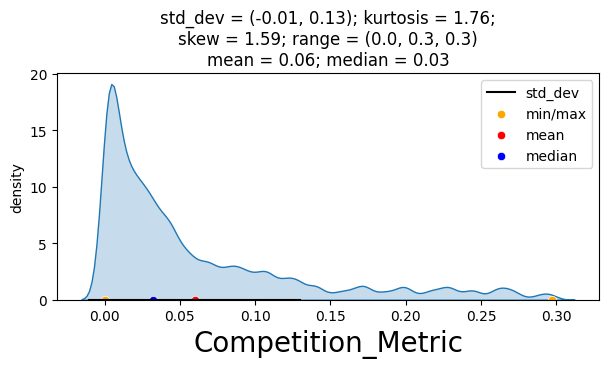

In [34]:
UVA_numeric(cm_data, ["Competition_Metric"])

In [35]:
quant25 = train_data.Competition_Metric.quantile(0.25)
quant75 = train_data.Competition_Metric.quantile(0.75)
IQR = quant75 - quant25
med = train_data.Competition_Metric.median()
whis_low = med-(1.5*IQR)
whis_high = med+(1.5*IQR)


In [36]:
# Calculating Number of Outliers
outlier_high = len(train_data.Competition_Metric[train_data.Competition_Metric>whis_high])
outlier_low = len(train_data.Competition_Metric[train_data.Competition_Metric<whis_low])

(outlier_high + outlier_low)/len(train_data.Competition_Metric)*100, len(train_data.Competition_Metric)


(14.381150078014088, 512087)

In [41]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True


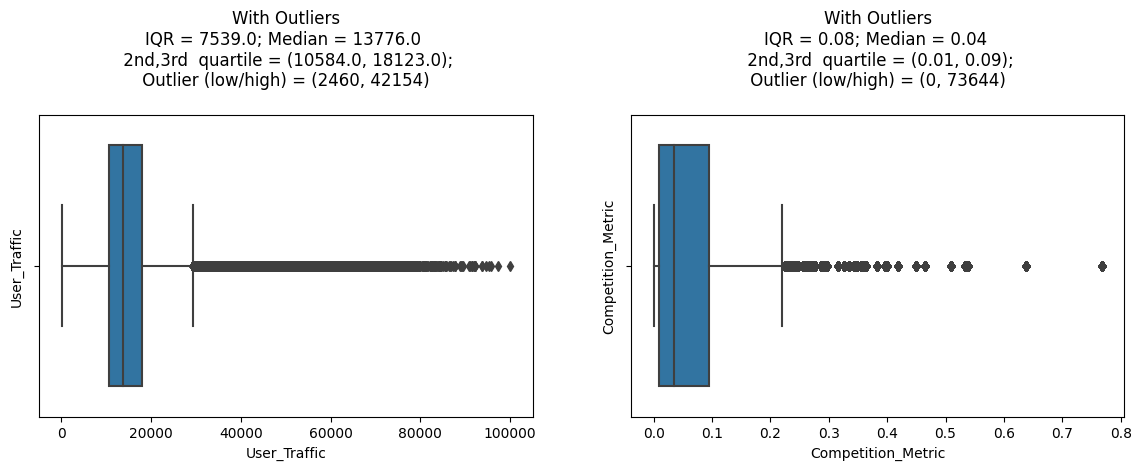

In [38]:
UVA_outlier(train_data, ['User_Traffic', 'Competition_Metric'])
#UVA_numeric(train_data, ['User_Traffic', 'Competition_Metric', 'Sales', 'Day'])


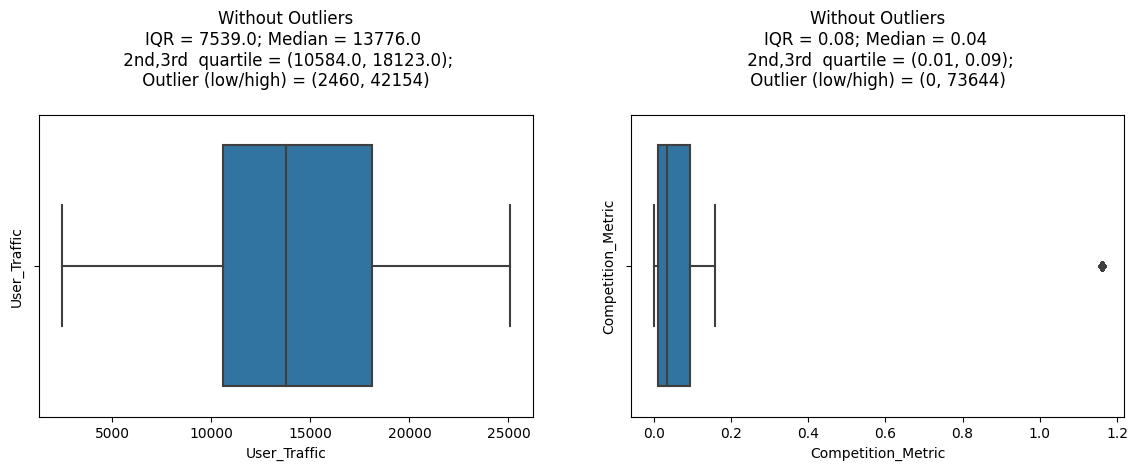

In [39]:
UVA_outlier(train_data, ['User_Traffic', 'Competition_Metric'], include_outlier=False)

(array([357927.,  75408.,  36270.,  22380.,   8636.,   3528.,   3528.,
           882.,    882.,    882.]),
 array([0.    , 0.0768, 0.1536, 0.2304, 0.3072, 0.384 , 0.4608, 0.5376,
        0.6144, 0.6912, 0.768 ]),
 <BarContainer object of 10 artists>)

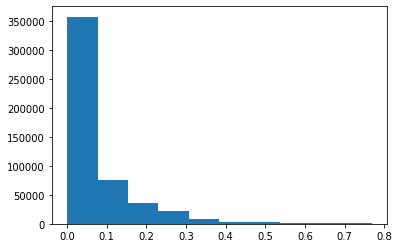

In [40]:
plt.hist(train_data.Competition_Metric)

In [41]:
len(train_data), 100*len(train_data[train_data.Competition_Metric >= 0.5])/len(train_data)

(512087, 1.0334181496503523)

In [42]:
train_data[train_data.Competition_Metric >= 0.5].describe()

,ID,Day_No,Course_ID,User_Traffic,Competition_Metric,Sales,Day,WeekofYear
count,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000
mean,244258.166667,441.500000,268.000000,14648.757937,0.582833,118.008692,164.888889,23.986395
std,121476.616972,254.635365,133.104024,6353.922891,0.093357,59.419210,105.764711,15.108897
min,64285.000000,1.000000,71.000000,1323.000000,0.509000,4.000000,1.000000,1.000000
25%,165423.750000,221.000000,182.000000,9639.000000,0.510000,76.000000,74.000000,11.000000
50%,226123.500000,441.500000,248.000000,13450.500000,0.536500,106.000000,147.500000,21.500000
75%,375459.250000,662.000000,412.000000,18963.000000,0.637000,148.000000,256.000000,37.000000
max,408134.000000,882.000000,447.000000,44478.000000,0.768000,567.000000,366.000000,53.000000


,User_Traffic,Competition_Metric
User_Traffic,1.000000,-0.148775
Competition_Metric,-0.148775,1.000000


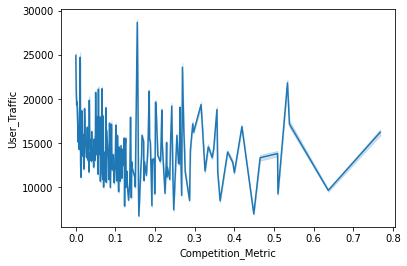

In [43]:
sns.lineplot(y = "User_Traffic", x = "Competition_Metric", data=train_data)

train_data[['User_Traffic', 'Competition_Metric']].corr()

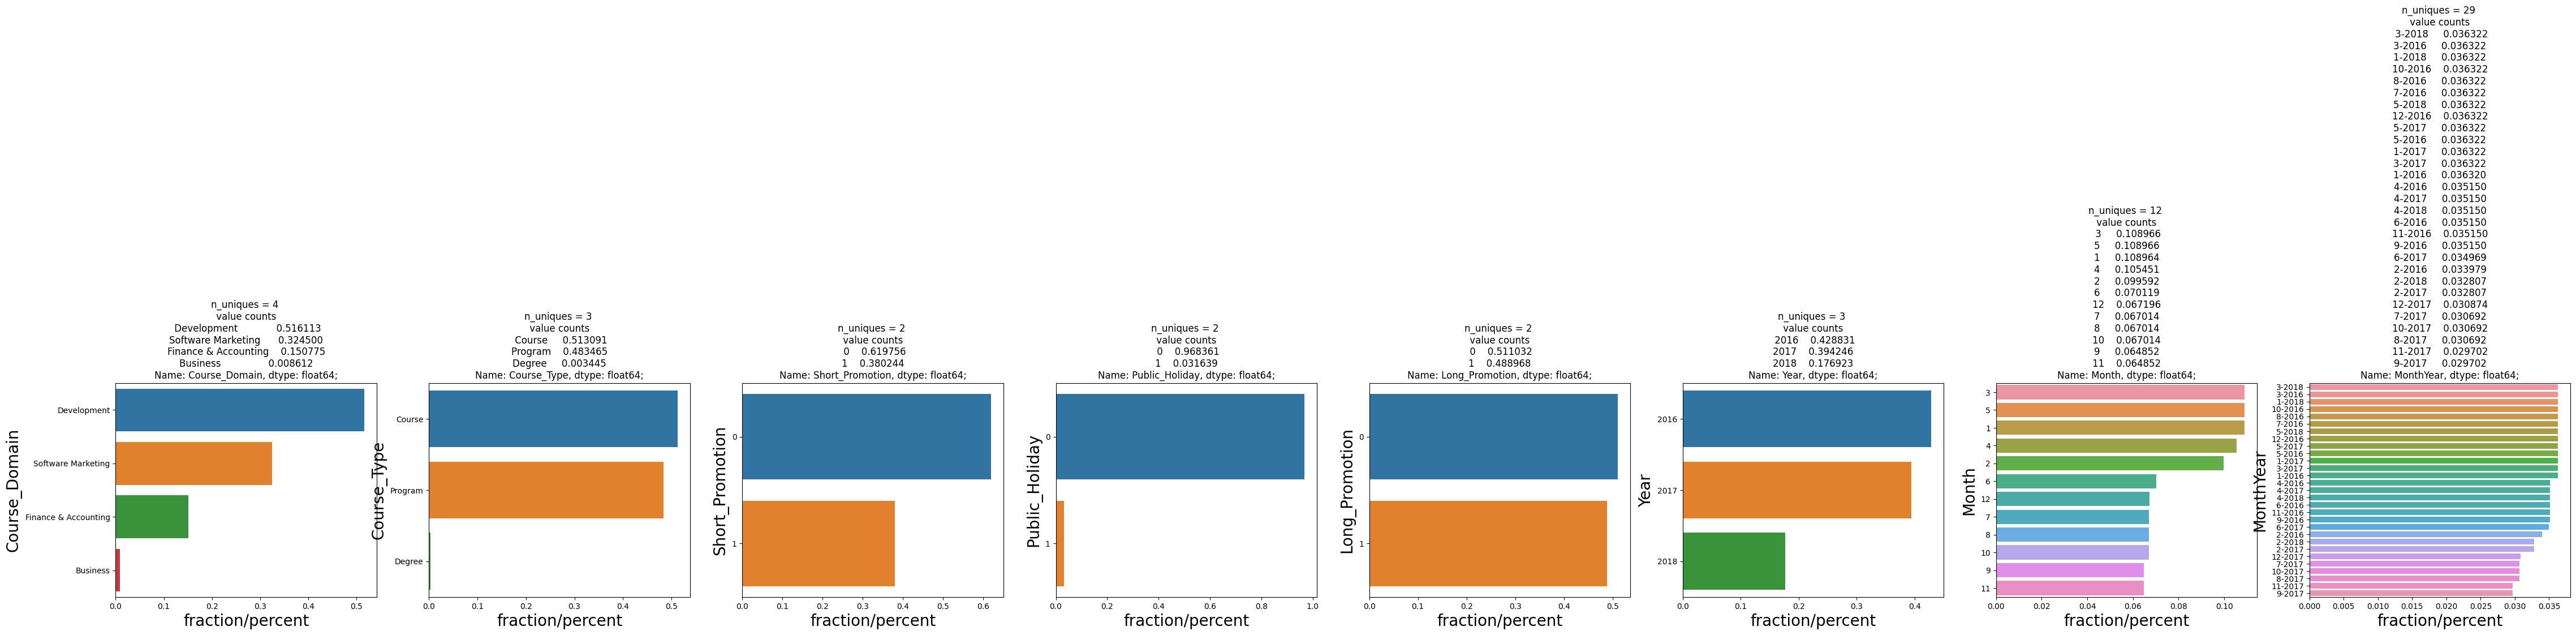

In [44]:
UVA_category(train_data, category_columns)

In [26]:
# We want to check sales per course

sales_avg_per_course = train_data.groupby(["Course_ID"]).mean()

In [27]:
sales_avg_per_course.Sales.describe()

count    600.000000
mean     120.486379
std       40.607455
min       50.197279
25%       92.487245
50%      113.883787
75%      138.797052
max      337.649660
Name: Sales, dtype: float64

In [28]:

course_avg = pd.DataFrame({
    "Course_ID": sales_avg_per_course.index,
    "Course_avg_sales": sales_avg_per_course.Sales
})

In [29]:
course_avg.reset_index(drop= True, inplace=True)
course_avg

,Course_ID,Course_avg_sales
0,1,85.251701
1,2,120.595238
2,3,153.207483
3,4,94.812925
4,5,113.215420
...,...,...
595,596,84.924036
596,597,91.241497
597,598,180.100907
598,599,116.346939


In [30]:
# Function to identify if the course has high sales or low sales
def course_type(df):
     Course_Sales_Type = []
     for i in df.Course_avg_sales:
          if (i > 138):
               Course_Sales_Type.append("Top Sales")
          elif (i < 92):
               Course_Sales_Type.append("Low Sales")
          else:
               Course_Sales_Type.append("Average Sales")    
     return Course_Sales_Type


In [31]:
course_avg["Course_Sales_Type"] = course_type(course_avg)


In [32]:
course_avg.Course_Sales_Type.value_counts()

Average Sales    300
Top Sales        154
Low Sales        146
Name: Course_Sales_Type, dtype: int64

In [33]:
train_data = train_data.merge(course_avg, how='left', on='Course_ID')


In [34]:
test_data = test_data.merge(course_avg, how='left', on='Course_ID')


In [35]:
train_data.shape, test_data.shape

((512087, 19), (36000, 17))

In [154]:
train_data.tail()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,Year,Day,Date,Month,WeekofYear,MonthYear,Course_avg_sales,Course_Sales_Type
512082,548023,878,600,Software Marketing,Program,0,0,1,8904,0.07,114,2018,147,2018-05-27,5,21,5-2018,109.198413,Average Sales
512083,548024,879,600,Software Marketing,Program,0,0,1,10542,0.07,145,2018,148,2018-05-28,5,22,5-2018,109.198413,Average Sales
512084,548025,880,600,Software Marketing,Program,0,0,1,13671,0.07,167,2018,149,2018-05-29,5,22,5-2018,109.198413,Average Sales
512085,548026,881,600,Software Marketing,Program,0,0,1,8904,0.07,107,2018,150,2018-05-30,5,22,5-2018,109.198413,Average Sales
512086,548027,882,600,Software Marketing,Program,1,0,1,11445,0.07,152,2018,151,2018-05-31,5,22,5-2018,109.198413,Average Sales


In [53]:
test_data.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Year,Day,Date,Month,WeekofYear,MonthYear,Course_avg_sales,Course_Sales_Type
0,883,883,1,Development,Course,1,0,1,0.007,2018,152,2018-06-01,6,22,6-2018,85.251701,Low Sales
1,884,884,1,Development,Course,1,0,1,0.007,2018,153,2018-06-02,6,22,6-2018,85.251701,Low Sales
2,885,885,1,Development,Course,1,0,1,0.007,2018,154,2018-06-03,6,22,6-2018,85.251701,Low Sales
3,886,886,1,Development,Course,1,0,1,0.007,2018,155,2018-06-04,6,23,6-2018,85.251701,Low Sales
4,887,887,1,Development,Course,0,0,1,0.007,2018,156,2018-06-05,6,23,6-2018,85.251701,Low Sales


In [55]:
pd.crosstab(train_data.Course_Sales_Type, [train_data.Short_Promotion, train_data.Long_Promotion], normalize=True, )

Short_Promotion           0                   1          
Long_Promotion            0         1         0         1
Course_Sales_Type                                        
Average Sales      0.157149  0.152837  0.096609  0.093586
Low Sales          0.060773  0.088450  0.037400  0.054061
Top Sales          0.098515  0.062032  0.060587  0.038001

In [36]:
# Function to identify high or low Competition
def competition_type(df):
     Competition_Type = []
     for i in df.Competition_Metric:
          if (i > 0.094):
               Competition_Type.append("High Competition")
          elif (i < 0.01):
               Competition_Type.append("Low Competition")
          else:
               Competition_Type.append("Average Competition")    
     return Competition_Type


In [37]:
train_data["Competition_Type"] = competition_type(train_data)
test_data["Competition_Type"] = competition_type(test_data)


In [58]:
train_data.tail()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,Year,Day,Date,Month,WeekofYear,MonthYear,Course_avg_sales,Course_Sales_Type,Competition_Type
512082,548023,878,600,Software Marketing,Program,0,0,1,8904,0.07,114,2018,147,2018-05-27,5,21,5-2018,109.198413,Average Sales,Average Competition
512083,548024,879,600,Software Marketing,Program,0,0,1,10542,0.07,145,2018,148,2018-05-28,5,22,5-2018,109.198413,Average Sales,Average Competition
512084,548025,880,600,Software Marketing,Program,0,0,1,13671,0.07,167,2018,149,2018-05-29,5,22,5-2018,109.198413,Average Sales,Average Competition
512085,548026,881,600,Software Marketing,Program,0,0,1,8904,0.07,107,2018,150,2018-05-30,5,22,5-2018,109.198413,Average Sales,Average Competition
512086,548027,882,600,Software Marketing,Program,1,0,1,11445,0.07,152,2018,151,2018-05-31,5,22,5-2018,109.198413,Average Sales,Average Competition


In [59]:
test_data.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Year,Day,Date,Month,WeekofYear,MonthYear,Course_avg_sales,Course_Sales_Type,Competition_Type
0,883,883,1,Development,Course,1,0,1,0.007,2018,152,2018-06-01,6,22,6-2018,85.251701,Low Sales,Low Competition
1,884,884,1,Development,Course,1,0,1,0.007,2018,153,2018-06-02,6,22,6-2018,85.251701,Low Sales,Low Competition
2,885,885,1,Development,Course,1,0,1,0.007,2018,154,2018-06-03,6,22,6-2018,85.251701,Low Sales,Low Competition
3,886,886,1,Development,Course,1,0,1,0.007,2018,155,2018-06-04,6,23,6-2018,85.251701,Low Sales,Low Competition
4,887,887,1,Development,Course,0,0,1,0.007,2018,156,2018-06-05,6,23,6-2018,85.251701,Low Sales,Low Competition


# Dimensionality Reduction


In [38]:
update_train_data = train_data.copy()
update_test_data = test_data.copy()

### Drop Columns not needed

In [39]:
update_train_data.drop(['ID', 'Day_No', 'User_Traffic', 'Date', 'MonthYear'], axis=1, inplace=True)
update_test_data.drop(['ID', 'Day_No', 'Date', 'MonthYear'], axis=1, inplace=True)

In [159]:
#update_train_data.drop(update_train_data[update_train_data.Competition_Metric.isnull()].index, axis=0, inplace=True)

In [40]:
update_train_data.Course_Sales_Type = update_train_data.Course_Sales_Type.astype("category")
update_test_data.Course_Sales_Type = update_test_data.Course_Sales_Type.astype("category")

update_train_data.WeekofYear = update_train_data.WeekofYear.astype("int64")
update_test_data.WeekofYear = update_test_data.WeekofYear.astype("int64")


In [41]:
update_numeric_columns = update_train_data.select_dtypes(include = ['int64', 'float64'])
update_category_columns = update_train_data.select_dtypes(include = ['category'])


In [42]:
update_numeric_columns.drop('Sales', axis=1, inplace=True)

### Handling Skewness

<AxesSubplot:xlabel='Competition_Metric', ylabel='Density'>

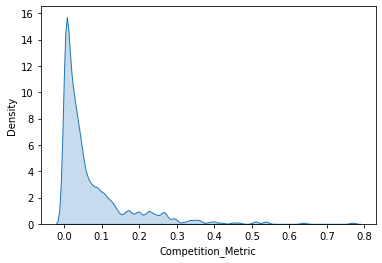

In [163]:
sns.kdeplot(update_train_data["Competition_Metric"], shade=True)

In [43]:
#from numpy import exp
update_train_data["Competition_Metric"] = np.cbrt(update_train_data.Competition_Metric)
update_test_data["Competition_Metric"] = np.cbrt(update_test_data.Competition_Metric)

<AxesSubplot:xlabel='Competition_Metric', ylabel='Density'>

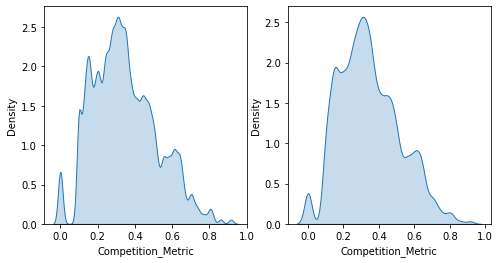

In [44]:
# Plot a comparison
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(update_train_data["Competition_Metric"], shade=True, ax=axs[0])
sns.kdeplot(update_test_data["Competition_Metric"], shade=True, ax=axs[1])


### Scale numeric

In [166]:
update_numeric_columns.columns

Index(['Course_ID', 'Competition_Metric', 'Day', 'WeekofYear',
       'Course_avg_sales'],
      dtype='object')

In [45]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar.fit(update_train_data[update_numeric_columns.columns])

MinMaxScaler()

In [46]:
update_train_data[update_numeric_columns.columns] = scalar.transform(update_train_data[update_numeric_columns.columns])
update_test_data[update_numeric_columns.columns] = scalar.transform(update_test_data[update_numeric_columns.columns])


In [47]:
update_train_data[update_numeric_columns.columns].describe()

,Course_ID,Competition_Metric,Day,WeekofYear,Course_avg_sales
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000
mean,0.499814,0.375524,0.439160,0.432261,0.245709
std,0.289425,0.186425,0.288175,0.289056,0.141972
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.248748,0.235259,0.194521,0.192308,0.147377
50%,0.499165,0.357192,0.389041,0.384615,0.223012
75%,0.751252,0.496503,0.682192,0.673077,0.309273
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
update_test_data[update_numeric_columns.columns].describe()

,Course_ID,Competition_Metric,Day,WeekofYear,Course_avg_sales
count,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000
mean,0.500000,0.375134,0.494521,0.487500,0.244524
std,0.289161,0.185706,0.047448,0.047991,0.141151
min,0.000000,0.000000,0.413699,0.403846,0.000000
25%,0.250000,0.235259,0.454110,0.442308,0.147120
50%,0.500000,0.353758,0.494521,0.480769,0.221555
75%,0.750000,0.493843,0.534932,0.524038,0.308224
max,1.000000,1.000000,0.575342,0.576923,1.000000


### Encode Categorical Data

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
onehotencode_columns = ['Course_Domain', 'Course_Type']
ordinalencode_columns = ['Year',  'Course_Sales_Type', 'Competition_Type']

In [51]:
onehotencode = OneHotEncoder(sparse=False, handle_unknown='ignore')

onehotencode.fit(update_train_data[onehotencode_columns])


OneHotEncoder(handle_unknown='ignore', sparse=False)

In [52]:
encoded_cols = list(onehotencode.get_feature_names(onehotencode_columns))

In [53]:
update_train_data[encoded_cols] = onehotencode.transform(update_train_data[onehotencode_columns])
update_test_data[encoded_cols] = onehotencode.transform(update_test_data[onehotencode_columns])

In [54]:
update_train_data.drop(['Course_Domain', 'Course_Type'], axis=1, inplace=True)
update_test_data.drop(['Course_Domain', 'Course_Type'], axis=1, inplace=True)

## Ordinal Encoding

In [55]:
year_mapper = {"2016":1, "2017":2, "2018":3}
course_Salestype_mapper = {"Low Sales":1, "Average Sales":2, "Top Sales":3}
competition_mapper = {"Low Competition":1, "Average Competition":2, "High Competition":3}

In [56]:
update_train_data["Year"] = update_train_data["Year"].replace(year_mapper)
update_train_data["Course_Sales_Type"] = update_train_data["Course_Sales_Type"].replace(course_Salestype_mapper)
update_train_data["Competition_Type"] = update_train_data["Competition_Type"].replace(competition_mapper)


update_test_data["Year"] = update_test_data["Year"].replace(year_mapper)
update_test_data["Course_Sales_Type"] = update_test_data["Course_Sales_Type"].replace(course_Salestype_mapper)
update_test_data["Competition_Type"] = update_test_data["Competition_Type"].replace(competition_mapper)

In [57]:
update_test_data.head()

,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Year,Day,Month,WeekofYear,Course_avg_sales,Course_Sales_Type,Competition_Type,Course_Domain_Business,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Course,Course_Type_Degree,Course_Type_Program
0,0.0,1,0,1,0.208887,3,0.413699,6,0.403846,0.121949,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1,0,1,0.208887,3,0.416438,6,0.403846,0.121949,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1,0,1,0.208887,3,0.419178,6,0.403846,0.121949,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1,0,1,0.208887,3,0.421918,6,0.423077,0.121949,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0,0,1,0.208887,3,0.424658,6,0.423077,0.121949,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [58]:
update_train_data.head()

,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Sales,Year,Day,Month,WeekofYear,Course_avg_sales,Course_Sales_Type,Competition_Type,Course_Domain_Business,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Course,Course_Type_Degree,Course_Type_Program
0,0.0,0,1,1,0.208887,81,1,0.000000,1,1.0,0.121949,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0,0,1,0.208887,79,1,0.002740,1,1.0,0.121949,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0,0,1,0.208887,75,1,0.005479,1,1.0,0.121949,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0,0,1,0.208887,80,1,0.008219,1,0.0,0.121949,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0,0,1,0.208887,41,1,0.010959,1,0.0,0.121949,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Now, lets collect the required data for training in a new DF

In [59]:
model_train_data = update_train_data.copy()
model_test_data = update_test_data.copy()

In [60]:
#model_train_data.to_csv("Cleaned_learnX_train.csv")
#model_test_data.to_csv("Cleaned_learnX_test.csv")


In [181]:
model_train_data["Short_Promotion"] = model_train_data["Short_Promotion"].astype('int64')
model_train_data["Public_Holiday"] = model_train_data["Public_Holiday"].astype('int64')
model_train_data["Long_Promotion"] = model_train_data["Long_Promotion"].astype('int64')
model_train_data["Month"] = model_train_data["Month"].astype('int64')


model_test_data["Short_Promotion"] = model_test_data["Short_Promotion"].astype('int64')
model_test_data["Public_Holiday"] = model_test_data["Public_Holiday"].astype('int64')
model_test_data["Long_Promotion"] = model_test_data["Long_Promotion"].astype('int64')
model_test_data["Month"] = model_test_data["Month"].astype('int64')

#Public_Holiday Competition_Metric Month

In [182]:
X = model_train_data.drop('Sales', axis=1)
y = model_train_data['Sales']

In [183]:
X.shape, y.shape

((512087, 19), (512087,))

In [184]:
#splitting data into test and train data
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 23)

## Model building and cross validation

In [185]:
# Here, we will import LinearRegressor instead of LogisticRegression that we imported for Classification problem

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [96]:
# Linear Model
model1 = LinearRegression()
model1.fit(train_X, train_y)

# KNN model

model2 = KNeighborsRegressor(n_neighbors=9)
model2.fit(train_X, train_y)

# Decision Tree Model

model3 = DecisionTreeRegressor(max_depth=5)
model3.fit(train_X, train_y)


DecisionTreeRegressor(max_depth=5)

In [97]:
model2a = KNeighborsRegressor(n_neighbors=13)
model2a.fit(train_X, train_y)

model2b = KNeighborsRegressor(n_neighbors=15)
model2b.fit(train_X, train_y)

model2c = KNeighborsRegressor(n_neighbors=17)
model2c.fit(train_X, train_y)


KNeighborsRegressor(n_neighbors=17)

In [98]:
model2d = KNeighborsRegressor(n_neighbors=7)
model2d.fit(train_X, train_y)

model2e = KNeighborsRegressor(n_neighbors=8)
model2e.fit(train_X, train_y)


KNeighborsRegressor(n_neighbors=8)

In [ ]:
pred2a_test = model2a.predict(test_X)
pred2b_test = model2b.predict(test_X)
pred2c_test = model2c.predict(test_X)


In [ ]:
pred2d_test = model2d.predict(test_X)
pred2e_test = model2e.predict(test_X)

In [ ]:
mean_squared_log_error(pred2d_test, test_y)*1000, mean_squared_log_error(pred2e_test, test_y)*1000

(62.07321144528977, 61.665451176443476)

In [ ]:
mean_squared_log_error(pred2a_test, test_y)*1000, mean_squared_log_error(pred2b_test, test_y)*1000, mean_squared_log_error(pred2c_test, test_y)*1000

(62.200567110507734, 62.79678357377536, 63.93687639406953)

In [186]:
from sklearn.metrics import mean_squared_log_error

In [ ]:
pred1 = model1.predict(train_X)
pred2 = model2.predict(train_X)
pred3 = model3.predict(train_X)

In [ ]:
mean_squared_log_error(pred2, train_y)*1000

51.49533217330547

In [ ]:
mean_squared_log_error(pred3, train_y)*1000

80.31852944226611

In [ ]:
pred2_test = model2.predict(test_X)
pred3_test = model3.predict(test_X)

In [ ]:
mean_squared_log_error(pred2_test, test_y)*1000, mean_squared_log_error(pred3_test, test_y)*1000

(61.55880344119967, 80.02376917114506)

Elbow test for KNN

In [473]:
def Elbow(k):
    test_error = []
    
    for i in k:
        clf = KNeighborsRegressor(n_neighbors= i )
        clf.fit(train_X, train_y)

        predict = clf.predict(test_X)
        score = mean_squared_log_error(predict, test_y)
        error = 1-score
        test_error.append(error)
    
    return test_error



In [474]:
k = range(6,15, 2)

In [475]:
elbow_list = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve')

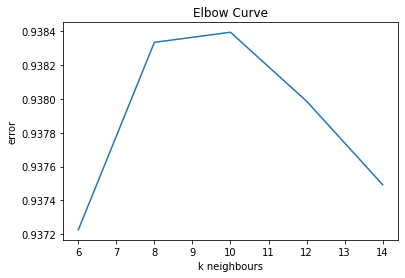

In [476]:
#now, we have the points (k) and the value of the points (elbow_list). Lets create a plot

plt.plot(k, elbow_list)
plt.xlabel("k neighbours")
plt.ylabel("error")
plt.title("Elbow Curve")

## Building a Random Forest Model

In [187]:
#Importing random forest classifier 
from sklearn.ensemble import RandomForestRegressor

In [188]:
#creating a random forest instance
random_forest = RandomForestRegressor(random_state=96)

In [189]:
#train the model
random_forest.fit(train_X,train_y)

RandomForestRegressor(random_state=96)

In [107]:
random_forest_test = random_forest.predict(test_X)


In [108]:
mean_squared_log_error(random_forest_test, test_y)*1000

0.4857414005652197

In [536]:
#feature importance against each variable
feature_importance = pd.Series(random_forest.feature_importances_, index=train_X.columns)

In [540]:
feature_importance = feature_importance.sort_values(ascending=False)
feature_importance

Course_avg_sales                      0.569541
Short_Promotion                       0.141521
Day                                   0.141192
WeekofYear                            0.036225
Year                                  0.021792
Competition_Metric                    0.018604
Public_Holiday                        0.016902
Course_ID                             0.016414
Course_Sales_Type                     0.013893
Month                                 0.006220
Course_Domain_Development             0.003491
Long_Promotion                        0.003418
Course_Type_Program                   0.002363
Course_Type_Course                    0.002331
Course_Domain_Software Marketing      0.002247
Course_Domain_Finance & Accounting    0.002235
Course_Domain_Business                0.001429
Course_Type_Degree                    0.000184
dtype: float64

### Random forest with Feature Importance

In [568]:
fi_train_X = train_X.drop(["Course_Domain_Development", "Course_Type_Program", "Course_Type_Course", "Course_Domain_Software Marketing", "Course_Domain_Finance & Accounting", "Course_Domain_Business"], axis=1)
fi_test_X = test_X.drop(["Course_Domain_Development", "Course_Type_Program", "Course_Type_Course", "Course_Domain_Software Marketing", "Course_Domain_Finance & Accounting", "Course_Domain_Business"], axis=1)

In [569]:
fi_random_forest = RandomForestRegressor(random_state=96)
fi_random_forest.fit(fi_train_X,train_y)


RandomForestRegressor(random_state=96)

In [570]:
fi_random_forest_test = fi_random_forest.predict(fi_test_X)
mean_squared_log_error(fi_random_forest_test, test_y)*1000

29.110612443771835

# Submission of Base Model

In [190]:
# KNN model

model2 = KNeighborsRegressor(n_neighbors=9)
model2.fit(train_X, train_y)


KNeighborsRegressor(n_neighbors=9)

In [503]:
#model_test_data["Competition_Metric"].replace(to_replace =np.nan, value =0, inplace=True)

In [490]:
#model_test_data.drop(model_test_data[model_test_data.Competition_Metric.isnull()].index, axis=0, inplace=True)

In [191]:
pred_submission1 = model2.predict(model_test_data)


In [506]:
submission1 = pd.read_csv("sample_wxeb1X4.csv")

In [507]:
pred_submission1.shape

(36000,)

In [509]:
submission1.Sales = pred_submission1

,ID,Sales
0,883,109.111111
1,884,109.111111
2,885,108.444444
3,886,106.555556
4,887,73.111111
...,...,...
35995,548083,125.555556
35996,548084,125.555556
35997,548085,125.555556
35998,548086,125.555556


In [510]:
pd.DataFrame(submission1, columns=['ID','Sales']).to_csv('submit1.csv')



## Submission 2

In [192]:
pred_submission2 = random_forest.predict(model_test_data)


In [517]:
submission2 = pd.read_csv("sample_wxeb1X4.csv")

In [519]:
pred_submission2.shape

(36000,)

In [520]:
submission2.Sales = pred_submission2

In [521]:
pd.DataFrame(submission2, columns=['ID','Sales']).to_csv('submit2.csv')


# [BEST] Ensemble of Submission1 and Submission2 - Average

In [193]:
from statistics import mean
ensemble_pred_1 = []

for i in range (0, len(model_test_data)):
    ensemble_pred_1 = np.append(ensemble_pred_1, mean([pred_submission1[i],  pred_submission2[i]]))

In [194]:
submission3 = pd.read_csv("sample_wxeb1X4.csv")

In [195]:
submission3.Sales = ensemble_pred_1

In [196]:
pd.DataFrame(submission3, columns=['ID','Sales']).to_csv('submit_final2.csv')


# [Ok OK model]Ensemble of Submission1 and Submission2 - Weighted Mean

In [530]:
from statistics import mean
ensemble_pred_2 = []

for i in range (0, len(model_test_data)):
    ensemble_pred_2 = np.append(ensemble_pred_2, mean([pred_submission1[i],  pred_submission2[i], pred_submission2[i]]))

In [529]:
submission4 = pd.read_csv("sample_wxeb1X4.csv")

In [532]:
submission4.Sales = ensemble_pred_2

In [533]:
pd.DataFrame(submission4, columns=['ID','Sales']).to_csv('submit4.csv')


# [BAD] Ensemble of Submission1 and RandomForest after feature selection - Mean

In [571]:
from statistics import mean
ensemble_pred_3 = []

for i in range (0, len(model_test_data)):
    ensemble_pred_3 = np.append(ensemble_pred_3, mean([pred_submission1[i],  fi_random_forest_test[i]]))

In [572]:
submission5 = pd.read_csv("sample_wxeb1X4.csv")

In [573]:
submission5.Sales = ensemble_pred_3

In [574]:
pd.DataFrame(submission5, columns=['ID','Sales']).to_csv('submit5.csv')
